In [ ]:
#DATASET DESCRIPTION
#I will take you through how to train a car price prediction model with machine learning using Python.
#The data set contains various attributes like car name, price,fuel,seller,driven etc
#The model will predict the price of a car in test data set

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [3]:
ds=pd.read_csv("car data.csv")

In [4]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
ds.shape

(301, 9)

In [6]:
ds.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#encoding data
ds.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
ds.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
ds.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
ds.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
x=ds.drop(['Car_Name','Selling_Price'],axis=1)
y=ds['Selling_Price']

In [11]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [14]:
LR_model=LinearRegression()

In [15]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [17]:
#prediction on training data
tdp=LR_model.predict(x_train)

In [18]:
error_score=metrics.r2_score(y_train,tdp)
print("R sqaured error: ",error_score)

R sqaured error:  0.8799451660493709


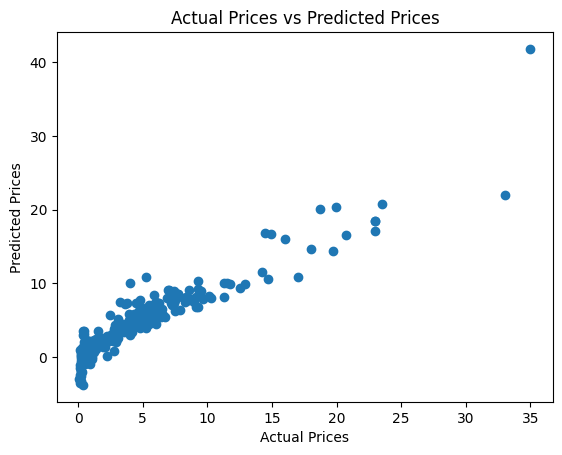

In [19]:
#Visualise the actual and predicted prices
plt.scatter(y_train,tdp)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [20]:
#prediction on test data
testdp=LR_model.predict(x_test)

In [21]:
error_score=metrics.r2_score(y_test,testdp)
print("R sqaured error: ",error_score)

R sqaured error:  0.8365766715026535


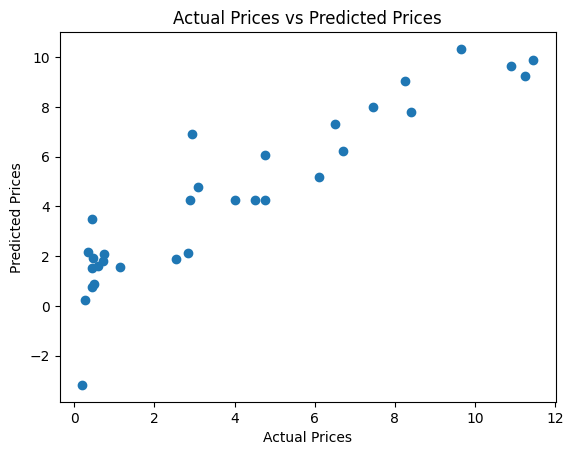

In [22]:
plt.scatter(y_test,testdp)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()